In [9]:
from utils import Dataloader
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import time
from sklearn.decomposition import PCA

In [10]:
def array_to_matrix(arr, n_cols):
    n_rows = len(arr) // n_cols
    return np.array(arr).reshape(n_rows, n_cols)

In [11]:
mushroom = Dataloader(None, None, 'mushroom', None, None)
print(f"Exporting mushroom to python... ")
data = mushroom.export_to_python()

fetching mushroom dataset
Dataset:  mushroom
X_train:  [[-0.21699152  0.14012794 -0.98389939 -0.84322964  1.3573133   0.16289645
  -0.43886364  1.49468272 -1.35889624  0.87351064  1.35578135  0.68377765
  -0.89305291  0.0965768   0.63199138  0.          0.14203663 -0.25613174
  -1.27221574  1.42842641  0.28432981 -0.8771691 ]
 [ 1.02971224  0.14012794 -0.19824983 -0.84322964 -1.01956488  0.16289645
  -0.43886364  1.49468272 -1.35889624  0.87351064  1.35578135 -0.9254372
   0.58638466  0.62244139  0.63199138  0.          0.14203663 -0.25613174
  -1.27221574  1.42842641  0.28432981  1.44858865]]
y_train:  [[-1.  1.]
 [-1.  1.]]
X_test:  [[-0.8403434  -1.48615695 -0.19824983 -0.84322964  0.40656203  0.16289645
   2.27861212 -0.66903831 -0.51147238  0.87351064  0.20869036  0.68377765
  -2.37249048  0.62244139  0.63199138  0.          0.14203663 -0.25613174
  -1.27221574 -0.2504706  -0.5143892  -0.29572966]
 [-0.8403434   0.14012794 -0.98389939 -0.84322964  1.83268894  0.16289645
  -0.43886

c:\Users\ACER\Documents\AI\KDL\KDL\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col] = le.fit_transform(X[col])
c:\Users\ACER\Documents\AI\KDL\KDL\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col] = le.fit_transform(X[col])
c:\Users\ACER\Documents\AI\KDL\KDL\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [12]:
C = 10.0
clf_mushroom = SVC(kernel = 'linear', C = C)
X_shape = mushroom.X_train_shape
X_train = data[0]
y_train = data[1]
y = array_to_matrix(y_train,2)
X = array_to_matrix(X_train,X_shape[1])
y = np.array([np.argmax(np.append(i,0)) for i in y])
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
clf_mushroom.fit(X_reduced, y) 


SVC(C=10.0, kernel='linear')

In [8]:
print(X.shape)

(6499, 22)


In [13]:
X_test = array_to_matrix(data[2],X_shape[1])
y_test = array_to_matrix(data[3],2)
y_test = np.array([np.argmax(np.append(i,0)) for i in y_test])


X_test_reduced = pca.transform(X_test)
y_pred = clf_mushroom.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

[1 1 1 ... 1 1 1]
Accuracy: 0.7704615384615384
Precision: 0.7386231038506418
Recall: 0.809462915601023
F1-score: 0.7724222086638194


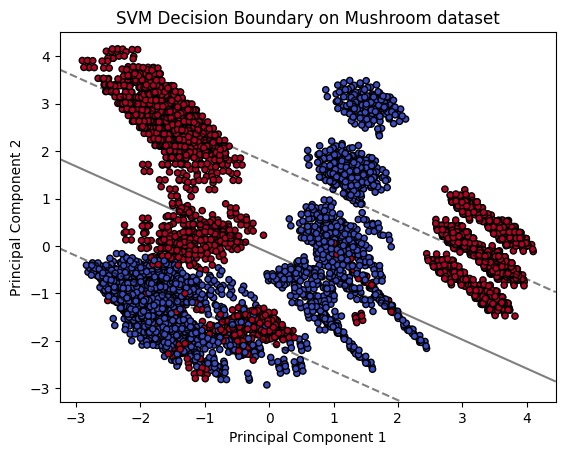

In [15]:
# 4. Vẽ biểu đồ
# Vẽ các điểm dữ liệu
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = clf_mushroom.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on Mushroom dataset")
plt.show()

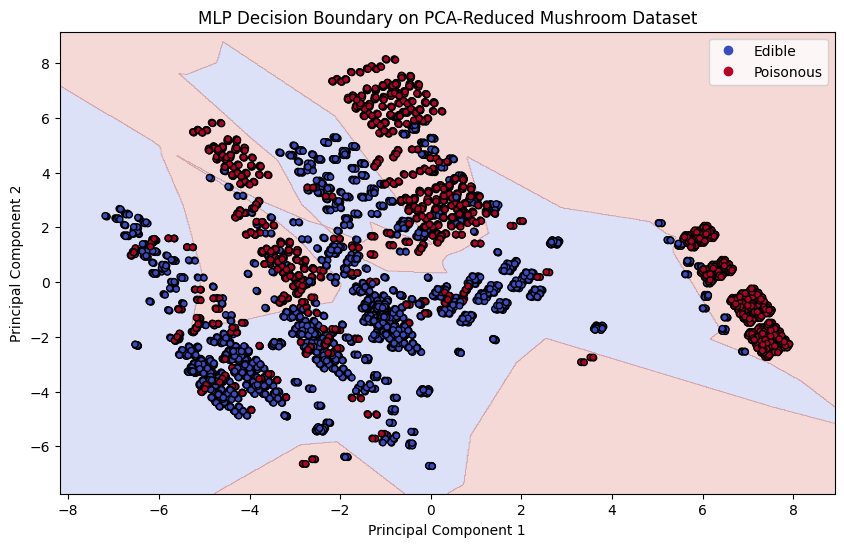

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

# 1. Load Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
                "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
                "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
                "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
data = pd.read_csv(url, header=None, names=column_names)

# 2. Preprocess Data
# Encode categorical data to numeric
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separate features and target
X = data.drop('class', axis=1).values
y = data['class'].values

# 3. PCA Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. Train Model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# 5. Visualize
# Define the mesh grid for plotting decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2,cmap=plt.cm.coolwarm)

# Plot the scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MLP Decision Boundary on PCA-Reduced Mushroom Dataset')
plt.legend(handles=scatter.legend_elements()[0], labels=['Edible', 'Poisonous'])
plt.show()
